# Introducción al análisis de datos con Python

Notebook preparado por el Dr. Irvin Hussein López Nava

Datos proporcionados por el Dr. Stephen Bullock

### Instalación de algunas librerías iniciales

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar y mostrar datos

In [9]:
# Enlace a los datos
url = 'https://raw.githubusercontent.com/husseinlopez/biologia/main/datosEM.csv'
# Importar datos a una tabla
df = pd.read_csv(url)
# Mostrar los primeros registros de los datos
print(df.head())

   serial#      Date  DOY  4 Tav1  4 Tav2  4 VPDav   4 SWC  4 GRav  4 GRmx  \
0        1  30/09/17  273    26.4     NaN      NaN     NaN     NaN     NaN   
1        2  08/10/17  281    22.9    25.8    2.615  0.0142   670.4   794.1   
2        3  16/10/17  289    24.1    31.2    3.663  0.0138   602.5   772.9   
3        4  24/10/17  297    26.6     NaN    3.054     NaN     NaN     NaN   
4        5  01/11/17  305    22.6     NaN    1.357     NaN     NaN     NaN   

   4 IG 8d  ...  6 IG 8d  6 GPPm  6 FPARm  5 Tav  5 Tmax  5 RHmin  5 VPDav  \
0    15.38  ...    24.07    12.4     0.23    NaN     NaN      NaN      NaN   
1    11.77  ...    21.61    13.4     0.26   19.0    29.1     31.5      1.3   
2    10.42  ...    25.25     8.3     0.22   21.5    31.9     22.5      2.0   
3    12.85  ...    26.59     7.3     0.22   20.6    30.1     29.3      1.7   
4    10.96  ...      NaN     8.9     0.12   15.3    23.3     47.8      0.6   

   5 IG 8d  5 GPPm  5 FPARm  
0     8.26    14.4     0.27  
1 

### Descripción de los datos

* Los datos son promedios de varios días (en general, 8 días) de los valores promedios o extremos diarios
* DOY es día del año calendario
* 4, 5 o 6 enfrente de las variables identifica el sitio
* Tav (°C) refiere a temperatura promedio (datos por minuto, promediados por medias horas luego por 24 hrs)
* Tmax (°C) refiere a la más alta temperatura promedio de media hora del día (24 hrs)
* VPDav (Pascales) refiere al promedio del déficit de la presión del vapor de agua en el aire (datos diurnas solamente, por minuto, promediados por medias horas luego por el día)
* SWC  (proporción, m3 m-3) refiere al contenido volumétrico de agua en el suelo (proporción), con datos de las 24 hrs
* GRav (W m-2) refiere al promedio de la radiación global en horas diurnas
* GRmx (W m-2) refiere al máximo valor de media hora de la radiación global en horas diurnas
* IG (índice de verdor) refiere al máximo valor tomado de varias fotos digitales de entre 0730 y 1630.
* GPPec (kg m-2 8días-1) captura de CO2 por el ecosistema estimado de por instrumentos terrestres+modelos del método de covarianza de turbulinas
* GPPm  (kg m-2 8dias-1) captura de CO2 por el ecosistema estimado de por instrumentos satelitales (un valor por día)+modelos del método MODIS17A
* FPARm (proporción) refiere a la fracción aborbida de la luz fotosinteticamente activa, un valor diario por percepción desde satelite



## Análisis exploratorio de los datos

Comencemos con los datos registrados para el Sitio 4

### Gráficas en función del tiempo

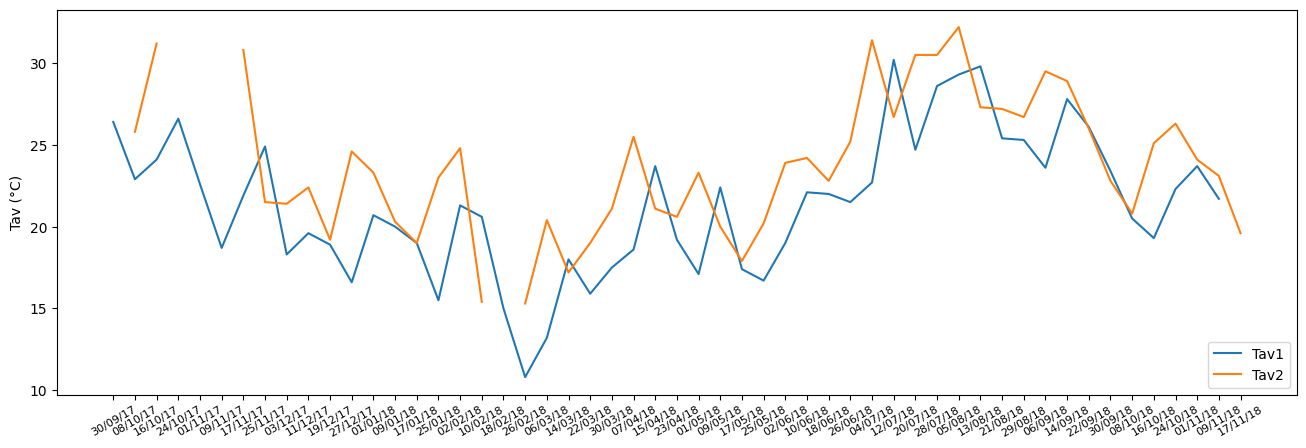

In [44]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafican las dos variables de temperatura
plt.plot(df['Date'], df['4 Tav1'])
plt.plot(df['Date'], df['4 Tav2'])
# Parámetros adicionales para la gráficas
plt.legend(["Tav1", "Tav2"], loc ="lower right")
plt.ylabel('Tav (°C)')
plt.xticks(rotation=30, fontsize=8);

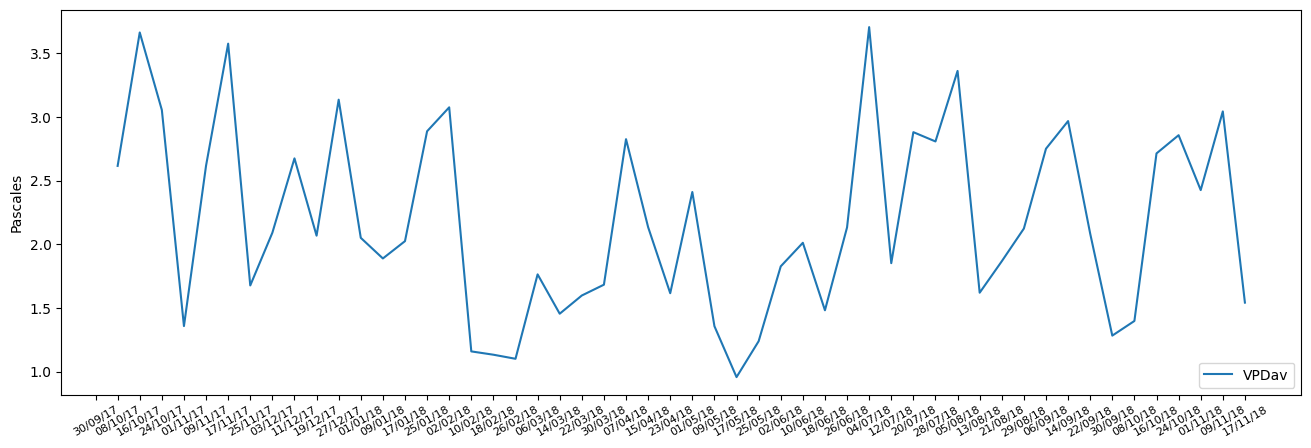

In [43]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica la déficit de presión
plt.plot(df['Date'], df['4 VPDav'])
# Parámetros adicionales para la gráficas
plt.legend(["VPDav"], loc ="lower right")
plt.ylabel('Pascales')
plt.xticks(rotation=30, fontsize=8);

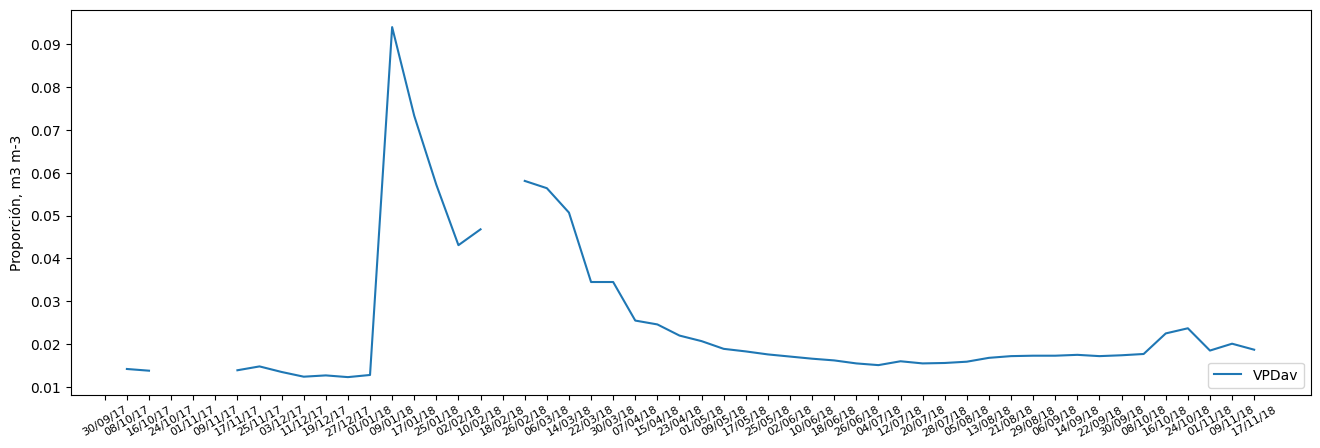

In [42]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica el contenido volimétrico del agua
plt.plot(df['Date'], df['4 SWC'])
# Parámetros adicionales para la gráficas
plt.legend(["VPDav"], loc ="lower right")
plt.ylabel('Proporción, m3 m-3')
plt.xticks(rotation=30, fontsize=8);

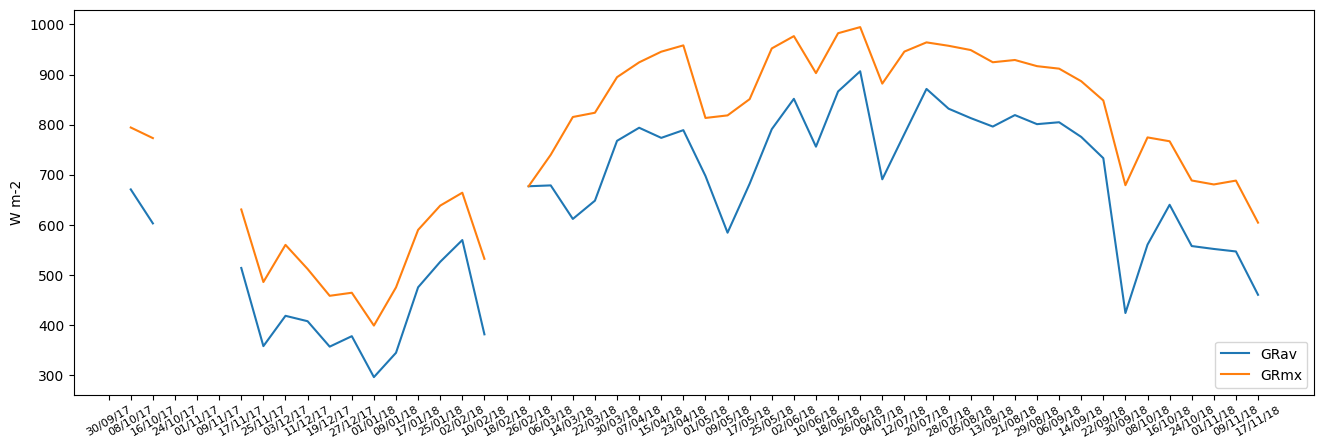

In [41]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafican las dos variables de radiación global
plt.plot(df['Date'], df['4 GRav'])
plt.plot(df['Date'], df['4 GRmx'])
# Parámetros adicionales para la gráficas
plt.legend(["GRav", "GRmx"], loc ="lower right")
plt.ylabel('W m-2')
plt.xticks(rotation=30, fontsize=8);

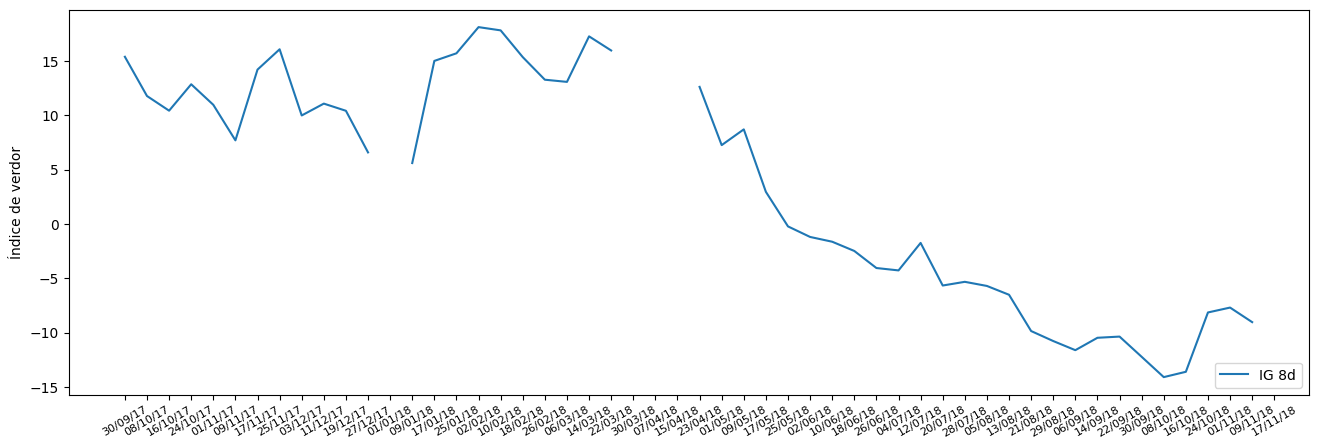

In [45]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica el índice de verdor
plt.plot(df['Date'], df['4 IG 8d'])
# Parámetros adicionales para la gráficas
plt.legend(["IG 8d"], loc ="lower right")
plt.ylabel('Índice de verdor')
plt.xticks(rotation=30, fontsize=8);

### Distribución de los datos por variable

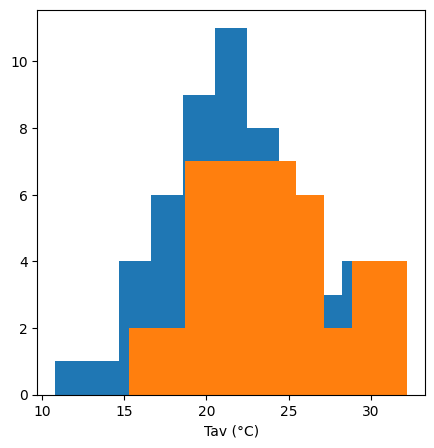

In [58]:
fig = plt.subplots(figsize=(5, 5))
plt.hist(df['4 Tav1']);
plt.hist(df['4 Tav2']);
plt.xlabel('Tav (°C)');

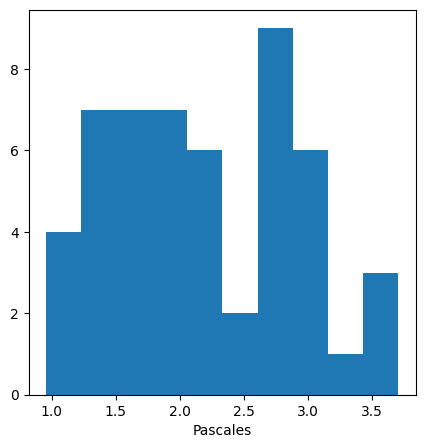

In [60]:
fig = plt.subplots(figsize=(5, 5))
plt.hist(df['4 VPDav']);
plt.xlabel('Pascales');

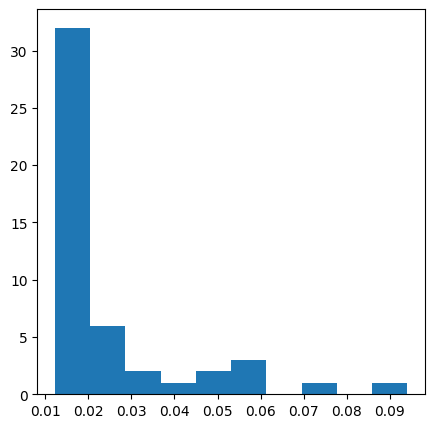

In [56]:
fig = plt.subplots(figsize=(5, 5))
plt.hist(df['4 SWC']);

array([[<Axes: title={'center': '4 GRav'}>,
        <Axes: title={'center': '4 GRmx'}>],
       [<Axes: title={'center': '4 IG 8d'}>,
        <Axes: title={'center': '4 FPARm'}>]], dtype=object)

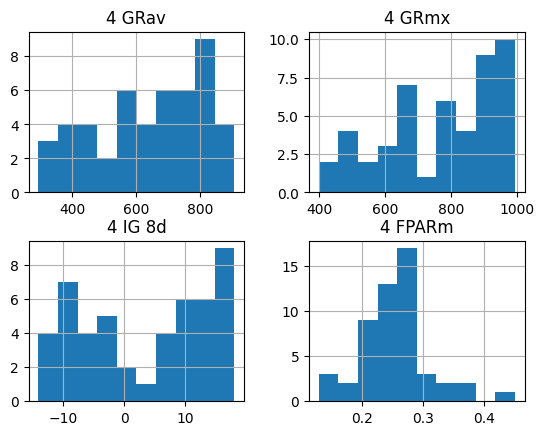

In [22]:
# Más variables del Sitio 4
df[['4 GRav', '4 GRmx', '4 IG 8d', '4 FPARm']].hist()

array([[<Axes: title={'center': '4 GPPec'}>,
        <Axes: title={'center': '4 GPPm1'}>]], dtype=object)

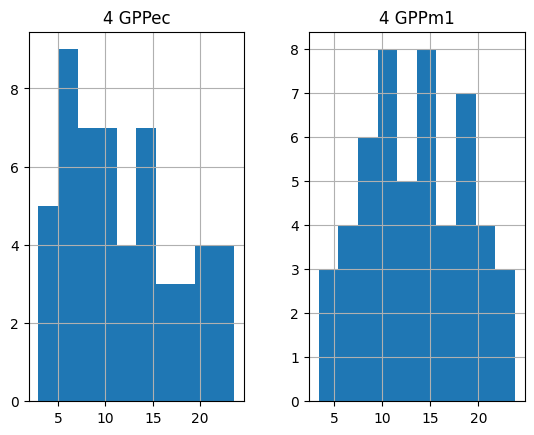

In [23]:
# Variables de captura de CO2
df[['4 GPPec', '4 GPPm1']].hist()

### Análisis de correlación

<Axes: >

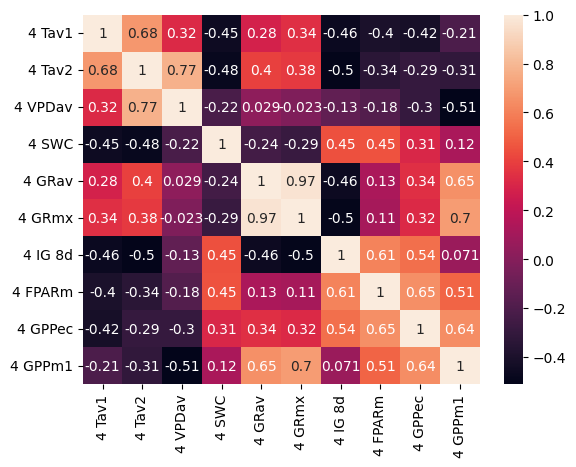

In [24]:
# Correlación entre variables del sitio 4
df4 = df[['4 Tav1', '4 Tav2', '4 VPDav', '4 SWC', '4 GRav', '4 GRmx', '4 IG 8d', '4 FPARm', '4 GPPec', '4 GPPm1']]
cor = df4.corr()
sns.heatmap(cor, annot = True)